In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import plotly.express as px


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/top-200-passwords-by-country-2021/top_200_password_2020_by_country.csv
/kaggle/input/common-password-image/100-Most-Common-Passwords-2021.-Can-You-Spot-Your-Password.jpg


![image](https://www.loginradius.com/blog/start-with-identity/static/f0ccb193ae49ca1feb33a60d08d3810b/0c4fc/passwordless-magic-links-cover.jpg)

In [2]:
df=pd.read_csv('../input/top-200-passwords-by-country-2021/top_200_password_2020_by_country.csv')
df

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds
0,au,Australia,1,123456,308483,< 1 second,1.0,0
1,au,Australia,2,password,191880,< 1 second,5.0,0
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800
3,au,Australia,4,password1,86884,< 1 second,16.0,0
4,au,Australia,5,123456789,75856,< 1 second,2.0,0
...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200


In [3]:
df.count()

country_code                9800
country                     9800
Rank                        9800
Password                    9800
User_count                  9800
Time_to_crack               9800
Global_rank                 3172
Time_to_crack_in_seconds    9800
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_code              9800 non-null   object 
 1   country                   9800 non-null   object 
 2   Rank                      9800 non-null   int64  
 3   Password                  9800 non-null   object 
 4   User_count                9800 non-null   int64  
 5   Time_to_crack             9800 non-null   object 
 6   Global_rank               3172 non-null   float64
 7   Time_to_crack_in_seconds  9800 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 612.6+ KB


<AxesSubplot:>

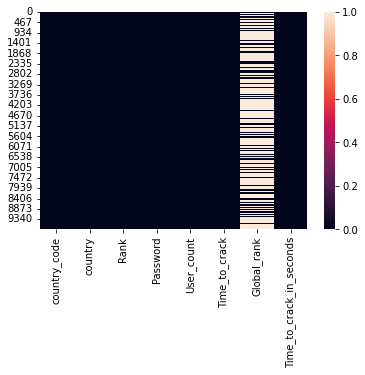

In [5]:
import seaborn as sns
sns.heatmap(df.isnull())
# the global rank contains the null values 

In [6]:
df.isnull().sum(axis = 0)
#contains 6628 missing values

country_code                   0
country                        0
Rank                           0
Password                       0
User_count                     0
Time_to_crack                  0
Global_rank                 6628
Time_to_crack_in_seconds       0
dtype: int64

In [7]:
#lets have similer cracking formates to define
df['Time_to_crack_in_minutes']=df['Time_to_crack_in_seconds']/60
df['Time_to_crack_in_hours']=df['Time_to_crack_in_seconds']/3600
df

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Time_to_crack_in_minutes,Time_to_crack_in_hours
0,au,Australia,1,123456,308483,< 1 second,1.0,0,0.0,0.000000
1,au,Australia,2,password,191880,< 1 second,5.0,0,0.0,0.000000
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,180.0,3.000000
3,au,Australia,4,password1,86884,< 1 second,16.0,0,0.0,0.000000
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,180.0,3.000000
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,17.0,0.283333
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,180.0,3.000000
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,120.0,2.000000


In [8]:
df.head(4)

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Time_to_crack_in_minutes,Time_to_crack_in_hours
0,au,Australia,1,123456,308483,< 1 second,1.0,0,0.0,0.0
1,au,Australia,2,password,191880,< 1 second,5.0,0,0.0,0.0
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,180.0,3.0
3,au,Australia,4,password1,86884,< 1 second,16.0,0,0.0,0.0


In [9]:
print("All count of uniuqe prices in dataset",df["Password"].count()) , print("    ")        
print("So we can see that there are few password that almost comman and use largely  ",df["Password"].value_counts().head(10))

All count of uniuqe prices in dataset 9800
    
So we can see that there are few password that almost comman and use largely   123456        49
password      49
123456789     49
12345         49
12345678      49
qwerty        48
1234567890    48
qwertyuiop    47
1234567       46
654321        46
Name: Password, dtype: int64


In [10]:
df[["Password","country"]].value_counts()

Password      country             
qwerty        Russia                  2
000000        Australia               1
mohammed      United Arab Emirates    1
modestas      Lithuania               1
mohamed       France                  1
                                     ..
chivas        Mexico                  1
chivas1       Mexico                  1
chiyeuminhem  Vietnam                 1
chocolat      Belgium                 1
пароль        Ukraine                 1
Length: 9799, dtype: int64

## password characteristics

In [11]:
#lets say how much passowrd is in lenght
df['Length']=df['Password'].str.len() #the password has 8 alphabets associated with

df['num_chars']=df['Password'].apply(lambda s: len(s)-len(re.sub(r'[a-zA-Z]', '', s)))
#number character password

df['num_digits']=df['Password'].apply(lambda s: len(s)-len(re.sub(r'\d', '', s)))
#number digit password

df['num_upper']=df['Password'].apply(lambda s: len(s)-len(re.sub(r'[A-Z]', '', s)))
#uppercase aplhabet 

df['num_lower']=df['Password'].apply(lambda s: len(s)-len(re.sub(r'[a-z]', '', s)))
#lower case number                                                                  
                                                                 
df['num_special']=df['Password'].apply(lambda s: len(s)-len(re.sub(r'[^0-9A-Za-z]', '', s)))
#specialcharacter passwords                                                                 
df['num_vowels']=df['Password'].apply(lambda s: len(s)-len(re.sub(r'[aeiouAEIOU]', '', s)))
#vowels                                                                

In [12]:
df.head(5)

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Time_to_crack_in_minutes,Time_to_crack_in_hours,Length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels
0,au,Australia,1,123456,308483,< 1 second,1.0,0,0.0,0.0,6,0,6,0,0,0,0
1,au,Australia,2,password,191880,< 1 second,5.0,0,0.0,0.0,8,8,0,0,8,0,2
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,180.0,3.0,8,8,0,0,8,0,3
3,au,Australia,4,password1,86884,< 1 second,16.0,0,0.0,0.0,9,8,1,0,8,0,2
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,0.0,0.0,9,0,9,0,0,0,0


In [13]:
df["Password"].unique()

array(['123456', 'password', 'lizottes', ..., 'lanhuong', 'congacon',
       'conmemay'], dtype=object)

In [14]:
dp=df.drop_duplicates(subset=['Password']).copy()
dp

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Time_to_crack_in_minutes,Time_to_crack_in_hours,Length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels
0,au,Australia,1,123456,308483,< 1 second,1.0,0,0.0,0.000000,6,0,6,0,0,0,0
1,au,Australia,2,password,191880,< 1 second,5.0,0,0.0,0.000000,8,8,0,0,8,0,2
2,au,Australia,3,lizottes,98220,3 Hours,NaN,10800,180.0,3.000000,8,8,0,0,8,0,3
3,au,Australia,4,password1,86884,< 1 second,16.0,0,0.0,0.000000,9,8,1,0,8,0,2
4,au,Australia,5,123456789,75856,< 1 second,2.0,0,0.0,0.000000,9,0,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,vn,Vietnam,196,hongngoc,2660,3 Hours,NaN,10800,180.0,3.000000,8,8,0,0,8,0,2
9796,vn,Vietnam,197,anhtien,2628,17 Minutes,NaN,1020,17.0,0.283333,7,7,0,0,7,0,3
9797,vn,Vietnam,198,lanhuong,2620,3 Hours,NaN,10800,180.0,3.000000,8,8,0,0,8,0,3
9798,vn,Vietnam,199,congacon,2584,2 Hours,NaN,7200,120.0,2.000000,8,8,0,0,8,0,3


In [15]:
dp.columns

Index(['country_code', 'country', 'Rank', 'Password', 'User_count',
       'Time_to_crack', 'Global_rank', 'Time_to_crack_in_seconds',
       'Time_to_crack_in_minutes', 'Time_to_crack_in_hours', 'Length',
       'num_chars', 'num_digits', 'num_upper', 'num_lower', 'num_special',
       'num_vowels'],
      dtype='object')

In [16]:
for col in dp[['Length',
       'num_chars', 'num_digits', 'num_upper', 'num_lower', 'num_special',
       'num_vowels']]:
    fig=px.histogram(x=dp[col], title=col)
    fig.show()

In [17]:
india_password = df[df["country_code"] == "in"]


In [18]:
india_password["country_code"].unique()

array(['in'], dtype=object)

In [19]:
india_password["country"].unique()
#so we have cleared that data table only contains ccomman password data of india

array(['India'], dtype=object)

In [20]:
india_passwords = india_password[['country_code', 'country', 'Rank', 'Password', 'User_count',
       'Time_to_crack', 'Time_to_crack_in_seconds',
       'Time_to_crack_in_minutes', 'Time_to_crack_in_hours', 'Length',
       'num_chars', 'num_digits', 'num_upper', 'num_lower', 'num_special',
       'num_vowels']]

In [21]:
india_passwords

,country_code,country,Rank,Password,User_count,Time_to_crack,Time_to_crack_in_seconds,Time_to_crack_in_minutes,Time_to_crack_in_hours,Length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels
3200,in,India,1,password,1714646,< 1 second,0,0.000000,0.000000,8,8,0,0,8,0,2
3201,in,India,2,12345,1289266,< 1 second,0,0.000000,0.000000,5,0,5,0,0,0,0
3202,in,India,3,123456,1114679,< 1 second,0,0.000000,0.000000,6,0,6,0,0,0,0
3203,in,India,4,123456789,270228,< 1 second,0,0.000000,0.000000,9,0,9,0,0,0,0
3204,in,India,5,12345678,241688,< 1 second,0,0.000000,0.000000,8,0,8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,in,India,196,devgupta,5621,3 Hours,10800,180.000000,3.000000,8,8,0,0,8,0,3
3396,in,India,197,hager,5621,10 Seconds,10,0.166667,0.002778,5,5,0,0,5,0,2
3397,in,India,198,emmagrange,5619,12 Days,1036800,17280.000000,288.000000,10,10,0,0,10,0,4
3398,in,India,199,miezwa,5616,32 Seconds,32,0.533333,0.008889,6,6,0,0,6,0,3


<AxesSubplot:>

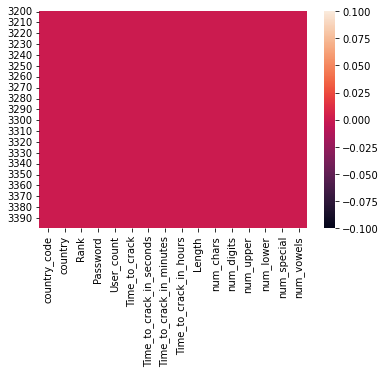

In [22]:
sns.heatmap(india_passwords.isnull())



In [23]:
india_passwords.nlargest(10, columns='Time_to_crack_in_seconds', keep='all')

,country_code,country,Rank,Password,User_count,Time_to_crack,Time_to_crack_in_seconds,Time_to_crack_in_minutes,Time_to_crack_in_hours,Length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels
3260,in,India,61,wowecarts@123,20062,3 Years,96422400,1607040.0,26784.0,13,9,3,0,9,1,3
3385,in,India,186,marcelasilva,5667,3 Years,96422400,1607040.0,26784.0,12,12,0,0,12,0,5
3375,in,India,176,julienerean,5732,4 Months,10713600,178560.0,2976.0,11,11,0,0,11,0,6
3393,in,India,194,Jaidalewis1,5649,4 Months,10713600,178560.0,2976.0,11,10,1,1,9,0,5
3300,in,India,101,jaihanuman,13869,12 Days,1036800,17280.0,288.0,10,10,0,0,10,0,5
3306,in,India,107,godisgreat,13064,12 Days,1036800,17280.0,288.0,10,10,0,0,10,0,4
3351,in,India,152,pravallika,6264,12 Days,1036800,17280.0,288.0,10,10,0,0,10,0,4
3374,in,India,175,mohmadsolh,5739,12 Days,1036800,17280.0,288.0,10,10,0,0,10,0,3
3377,in,India,178,braelynn12,5709,12 Days,1036800,17280.0,288.0,10,8,2,0,8,0,2
3397,in,India,198,emmagrange,5619,12 Days,1036800,17280.0,288.0,10,10,0,0,10,0,4


In [24]:
n = 10
india_passwords['Password'].value_counts()[:n].index.tolist()
#so the most used password in inida is word password 

['password',
 'aaaaaa',
 'praveen',
 'dinesh',
 '12341234',
 'test123',
 'karthik',
 'pass@123',
 'sriram',
 'sunny']

## top 10 hardest passwords to be cracked

In [25]:
dp.nlargest(10, columns='Time_to_crack_in_seconds', keep='all')

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Time_to_crack_in_minutes,Time_to_crack_in_hours,Length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels
793,br,Brazil,194,estantevirtual,5475,Centuries,NaN,3214080000,53568000.0,892800.0,14,14,0,0,14,0,6
3493,id,Indonesia,94,omarbelmestour,5871,Centuries,NaN,3214080000,53568000.0,892800.0,14,14,0,0,14,0,6
3495,id,Indonesia,96,kallynlavallee,5840,Centuries,NaN,3214080000,53568000.0,892800.0,14,14,0,0,14,0,5
1058,cl,Chile,59,paralelepipedo,3278,38 Years,NaN,1221350400,20355840.0,339264.0,14,14,0,0,14,0,7
999,ca,Canada,200,ihatethisgame,5762,31 Years,NaN,996364800,16606080.0,276768.0,13,13,0,0,13,0,6
3528,id,Indonesia,129,pabloparraito,4830,31 Years,NaN,996364800,16606080.0,276768.0,13,13,0,0,13,0,6
3554,id,Indonesia,155,clayburnclark,4290,31 Years,NaN,996364800,16606080.0,276768.0,13,13,0,0,13,0,3
9757,vn,Vietnam,158,dothingocthuy,3248,31 Years,NaN,996364800,16606080.0,276768.0,13,13,0,0,13,0,4
8633,tr,Turkey,34,seniseviyorum,8609,16 Years,NaN,514252800,8570880.0,142848.0,13,13,0,0,13,0,6
2828,gr,Greece,29,panathinaikos,3737,5 Years,NaN,160704000,2678400.0,44640.0,13,13,0,0,13,0,6


## Top 5 strong 6-character passwords

In [26]:
dp[dp['Length']==6].nlargest(5, columns='Time_to_crack_in_seconds', keep='all')

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Time_to_crack_in_minutes,Time_to_crack_in_hours,Length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels
494,be,Belgium,95,cedric,2119,3 Hours,NaN,10800,180.0,3.000000,6,6,0,0,6,0,2
5676,nz,New Zealand,77,beauty,4292,2 Hours,NaN,7200,120.0,2.000000,6,6,0,0,6,0,3
5819,ng,Nigeria,20,london,6556,2 Hours,NaN,7200,120.0,2.000000,6,6,0,0,6,0,2
3790,ie,Ireland,191,mkmkmk,863,26 Minutes,NaN,1560,26.0,0.433333,6,6,0,0,6,0,0
1316,cn,China,117,xxxxxx,11136,17 Minutes,NaN,1020,17.0,0.283333,6,6,0,0,6,0,0
3328,in,India,129,dinesh,10419,17 Minutes,NaN,1020,17.0,0.283333,6,6,0,0,6,0,2
4183,it,Italy,184,enrico,26755,17 Minutes,NaN,1020,17.0,0.283333,6,6,0,0,6,0,3
4185,it,Italy,186,nuvola,26170,17 Minutes,NaN,1020,17.0,0.283333,6,6,0,0,6,0,3


## correlation between password length and time to crack

In [27]:
dp[['Length', 'Time_to_crack_in_seconds']].corr()

,Length,Time_to_crack_in_seconds
Length,1.00000,0.18172
Time_to_crack_in_seconds,0.18172,1.00000


In [28]:
dcorr=dp[['Length',
       'num_chars', 'num_digits', 'num_upper', 'num_lower', 'num_special',
       'num_vowels', 'Time_to_crack_in_seconds']].corr()
dcorr

,Length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,Time_to_crack_in_seconds
Length,1.000000,0.553162,0.173568,0.093927,0.537230,-0.000587,0.374419,0.181720
num_chars,0.553162,1.000000,-0.721999,0.016818,0.991317,-0.060637,0.764384,0.141110
num_digits,0.173568,-0.721999,1.000000,0.053442,-0.724355,-0.004378,-0.591385,-0.016704
num_upper,0.093927,0.016818,0.053442,1.000000,-0.114807,0.059471,-0.038150,-0.002072
num_lower,0.537230,0.991317,-0.724355,-0.114807,1.000000,-0.068066,0.764455,0.140469
num_special,-0.000587,-0.060637,-0.004378,0.059471,-0.068066,1.000000,-0.054789,0.001698
num_vowels,0.374419,0.764384,-0.591385,-0.038150,0.764455,-0.054789,1.000000,0.107243
Time_to_crack_in_seconds,0.181720,0.141110,-0.016704,-0.002072,0.140469,0.001698,0.107243,1.000000


In [29]:
px.imshow(dcorr)

# character frequency

In [30]:
s=''.join(df['Password'].to_list())
s[:10]

'123456pass'

In [31]:
from collections import Counter
Counter(list(s))

Counter({'1': 3317,
         '2': 2483,
         '3': 2203,
         '4': 1211,
         '5': 1070,
         '6': 954,
         'p': 1147,
         'a': 7974,
         's': 3575,
         'w': 1240,
         'o': 3439,
         'r': 3514,
         'd': 1835,
         'l': 3054,
         'i': 3891,
         'z': 509,
         't': 2453,
         'e': 5161,
         '7': 755,
         '8': 576,
         '9': 495,
         'b': 1074,
         'c': 1696,
         'q': 804,
         'y': 910,
         'h': 1545,
         'n': 3747,
         'g': 932,
         '0': 413,
         'u': 1546,
         'v': 654,
         'm': 2237,
         'k': 1512,
         'j': 528,
         'f': 647,
         'x': 455,
         'F': 16,
         'S': 20,
         'K': 7,
         'I': 8,
         'Y': 7,
         'G': 10,
         'B': 10,
         'N': 4,
         '=': 1,
         'A': 14,
         'U': 4,
         'T': 2,
         'C': 5,
         'ñ': 4,
         '.': 2,
         'R': 4,
         'X': 5,

In [32]:
dfreq=pd.DataFrame(Counter(list(s)).items(), columns=['ch', 'freq'])
dfreq=dfreq.sort_values('freq', ascending=False)
dfreq

,ch,freq
7,a,7974
17,e,5161
14,i,3891
26,n,3747
8,s,3575
...,...,...
66,,1
65,é,1
64,Z,1
60,L,1


In [33]:
px.bar(dfreq.nlargest(40, 'freq'), x='ch', y='freq', title='Top 40 characters in password')

In [34]:
px.bar(dfreq[dfreq['ch'].str.contains('\d', regex=True)], x='ch', y='freq', title='digits in common passwords')